<a href="https://colab.research.google.com/github/drskprabhakar/AI-ML-DL-colab-notebooks-coding-models/blob/main/Android_sia_app_n_sia_calc_magnitude_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_excel('/content/drive/MyDrive/app and calc SIA magnitude dr aishwarya Raj.xlsx')


In [ ]:
df.shape

(107, 2)

In [ ]:
df.columns

Index(['app_magnitude', 'calc_magnitude'], dtype='object')

In [ ]:
df.describe()

,app_magnitude,calc_magnitude
count,107.000000,107.000000
mean,1.314382,1.490467
std,1.638689,1.096741
min,0.000000,0.170000
25%,0.353500,0.785000
50%,0.870000,1.260000
75%,1.580000,1.865000
max,9.000000,6.530000


In [ ]:
df.corr()

,app_magnitude,calc_magnitude
app_magnitude,1.00000,0.37748
calc_magnitude,0.37748,1.00000


array([[<Axes: title={'center': 'app_magnitude'}>,
        <Axes: title={'center': 'calc_magnitude'}>]], dtype=object)

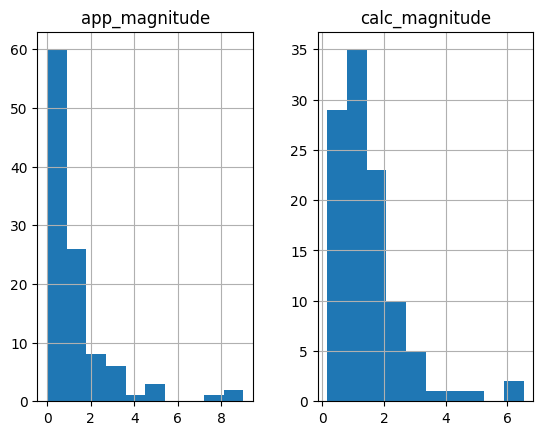

In [ ]:
df.hist()

<Axes: >

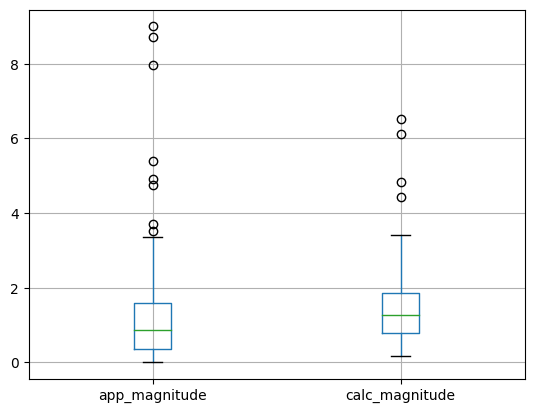

In [ ]:
df.boxplot()

<Axes: >

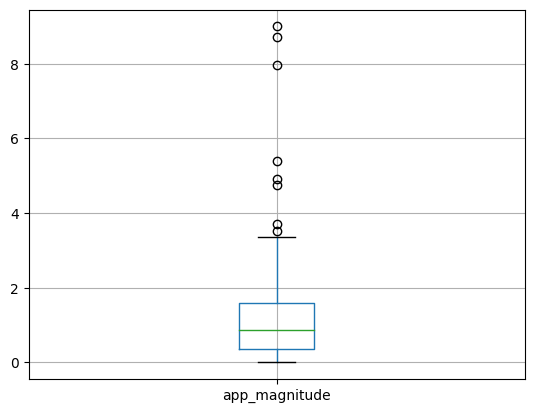

In [ ]:
df.boxplot('app_magnitude')

<Axes: >

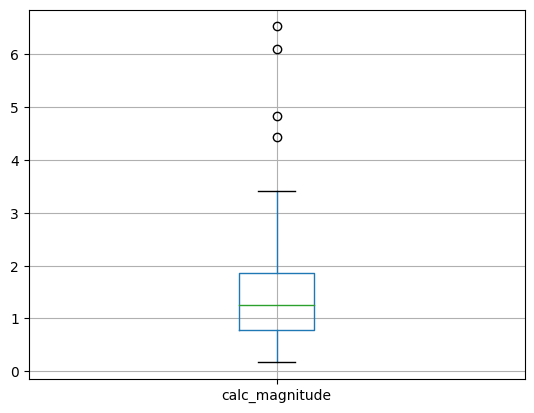

In [ ]:
df.boxplot('calc_magnitude')

<Axes: >

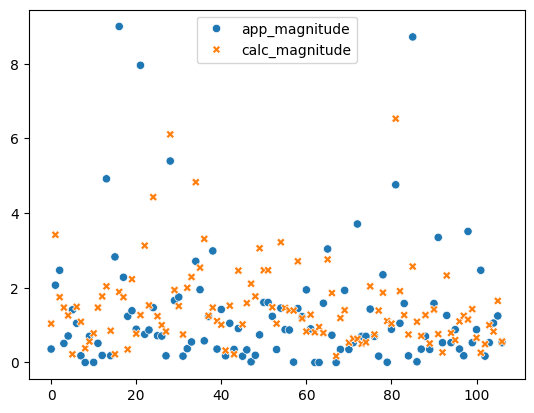

In [ ]:
import seaborn as sns
sns.scatterplot(df)

In [ ]:
q1 = df.app_magnitude.quantile(0.25)
q3 = df.app_magnitude.quantile(0.75)
q1,q3

(0.3535, 1.58)

In [ ]:
iqr = q3-q1
iqr

1.2265000000000001

In [ ]:
lowerlimit = q1-1.5*iqr
upperlimit = q3+1.5*iqr
lowerlimit, upperlimit

(-1.4862500000000003, 3.4197500000000005)

In [ ]:
df1 = df[(df.app_magnitude>lowerlimit) & (df.app_magnitude<upperlimit)]

In [ ]:
df1.shape

(99, 2)

<Axes: >

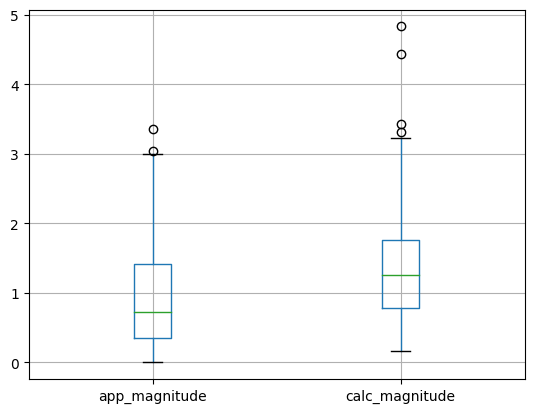

In [ ]:
df1.boxplot()

In [ ]:
q1c = df1.calc_magnitude.quantile(0.25)
q3c = df1.calc_magnitude.quantile(0.75)

In [ ]:
iqrc = q3c-q1c
iqrc

0.985

In [ ]:
lowerlimitc = q1c-1.5*iqrc
upperlimitc = q3c+1.5*iqrc

In [ ]:

df2 = df1[(df1.calc_magnitude>lowerlimitc) & (df1.calc_magnitude<upperlimitc)]




In [ ]:
df2.shape

(95, 2)

<Axes: >

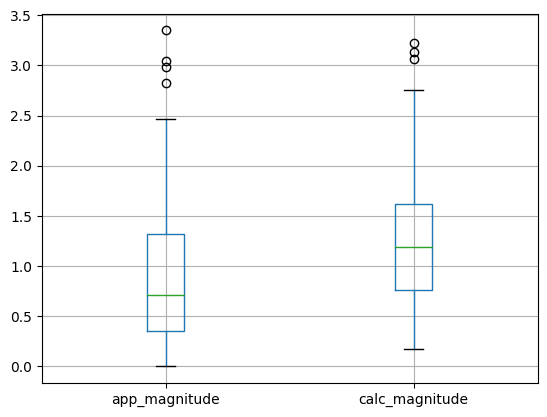

In [ ]:
df2.boxplot()

In [ ]:

q1m = df2.app_magnitude.quantile(0.25)
q3m = df2.app_magnitude.quantile(0.75)

In [ ]:
iqrm = q3m-q1m
iqrm

0.9735

In [ ]:
lowerlimitm = q1m-1.5*iqrm
upperlimitm = q3m+1.5*iqrm

In [ ]:
df3 = df2[(df2.app_magnitude>lowerlimitm) & (df2.app_magnitude<upperlimitm)]

<Axes: >

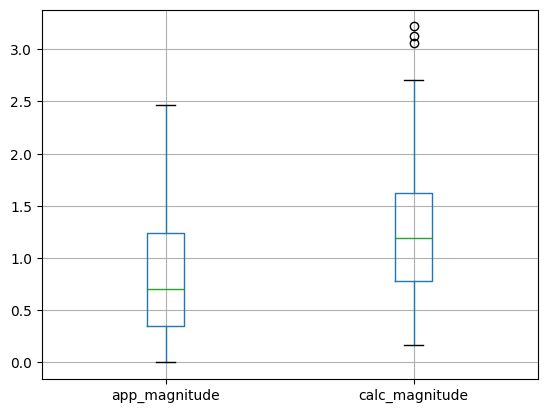

In [ ]:
df3.boxplot()

In [ ]:
df3.shape

(91, 2)

In [ ]:
q1c1 = df3.calc_magnitude.quantile(0.25)
q3c1 = df3.calc_magnitude.quantile(0.75)

In [ ]:
iqrc1 = q3c1-q1c1
iqrc1

0.8450000000000001

In [ ]:
lowerlimitc1 = q1c1-1.5*iqrc1
upperlimitc1 = q3c1+1.5*iqrc1

In [ ]:
df4 = df3[(df3.calc_magnitude>lowerlimitc1) & (df3.calc_magnitude<upperlimitc1)]

In [ ]:
df4.shape

(88, 2)

<Axes: >

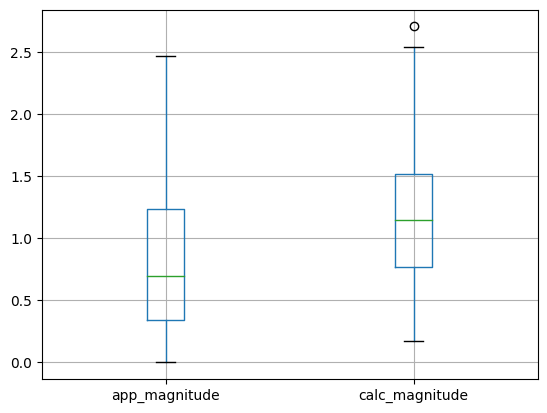

In [ ]:
df4.boxplot()

In [ ]:
q1c2 = df4.calc_magnitude.quantile(0.25)
q3c2 = df4.calc_magnitude.quantile(0.75)

In [ ]:
iqrc2 = q3c2-q1c2
iqrc2

0.7575

In [ ]:
lowerlimitc2 = q1c2-1.5*iqrc2
upperlimitc2 = q3c2+1.5*iqrc2

In [ ]:
df5 = df4[(df4.calc_magnitude>lowerlimitc2) & (df4.calc_magnitude<upperlimitc2)]



In [ ]:
df5.shape

(87, 2)

<Axes: >

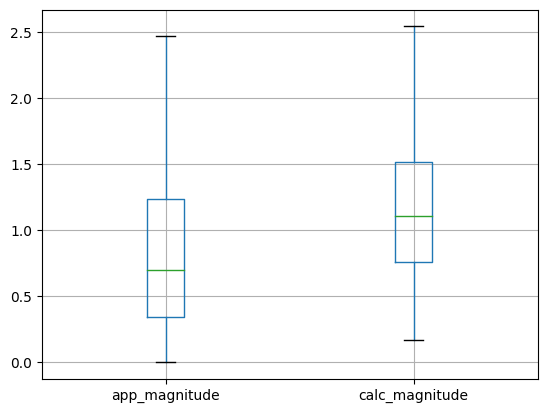

In [ ]:
df5.boxplot()

array([[<Axes: title={'center': 'app_magnitude'}>,
        <Axes: title={'center': 'calc_magnitude'}>]], dtype=object)

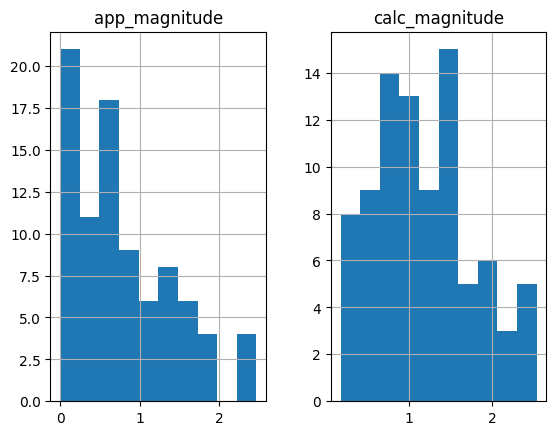

In [ ]:
df5.hist()

<Axes: >

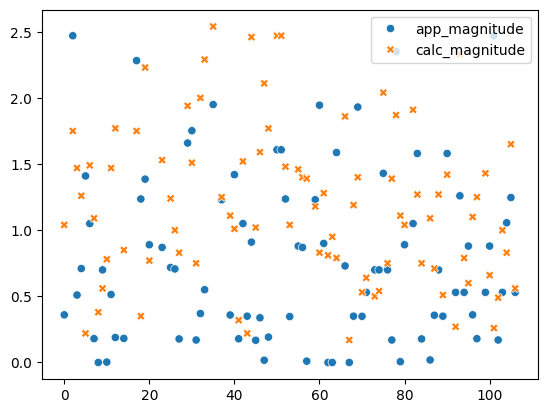

In [ ]:
sns.scatterplot(df5)

In [ ]:
df5.corr()

,app_magnitude,calc_magnitude
app_magnitude,1.000000,0.337178
calc_magnitude,0.337178,1.000000


In [ ]:
data1=df5['app_magnitude']
data2=df5['calc_magnitude']

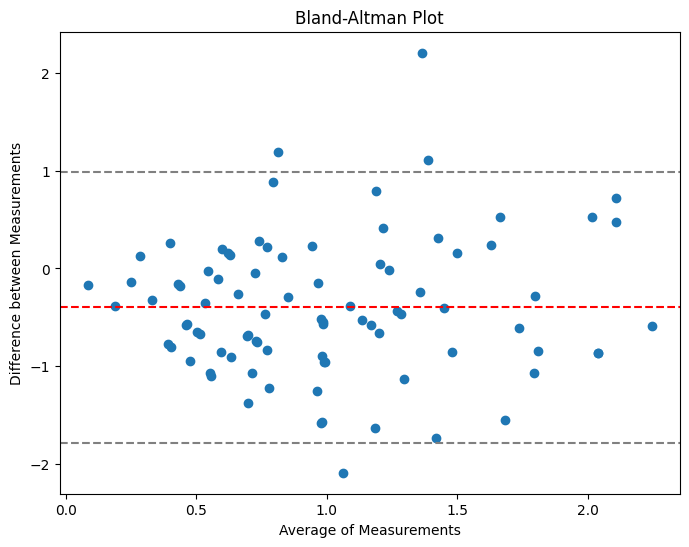

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def bland_altman_plot(data1, data2, *args, **kwargs):
    """
    Bland-Altman plot function.

    data1 : 1D array-like
        First set of measurements.
    data2 : 1D array-like
        Second set of measurements.
    """
    data1 = np.asarray(data1)
    data2 = np.asarray(data2)

    # Compute the differences between data1 and data2
    differences = data1 - data2

    # Compute the average of the measurements
    averages = (data1 + data2) / 2.0

    # Create the Bland-Altman plot
    plt.figure(figsize=(8, 6))
    plt.scatter(averages, differences, *args, **kwargs)

    # Add a horizontal line at the mean of the differences
    plt.axhline(differences.mean(), color='red', linestyle='--')

    # Add limits and labels
    mean_difference = differences.mean()
    sd_difference = differences.std()
    plt.title('Bland-Altman Plot')
    plt.xlabel('Average of Measurements')
    plt.ylabel('Difference between Measurements')
    plt.axhline(mean_difference + 1.96 * sd_difference, color='gray', linestyle='--')
    plt.axhline(mean_difference - 1.96 * sd_difference, color='gray', linestyle='--')

    # Show plot
    plt.show()

# Plot Bland-Altman plot
bland_altman_plot(data1, data2)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

# Generate synthetic data for dataset 1
X1, y1 = make_classification('df5')

# Generate synthetic data for dataset 2
X2, y2 = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=24)

# Split dataset 1 into train and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Split dataset 2 into train and test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=24)

# Initialize classifiers for dataset 1 and dataset 2
model1 = LogisticRegression()
model2 = RandomForestClassifier(n_estimators=100)

# Fit classifiers on dataset 1
model1.fit(X1_train, y1_train)
model2.fit(X2_train, y2_train)

# Predict probabilities of the positive class (class 1) for dataset 1 and dataset 2
y1_prob = model1.predict_proba(X1_test)[:, 1]
y2_prob = model2.predict_proba(X2_test)[:, 1]

# Compute ROC curve and ROC area for dataset 1 and dataset 2
fpr1, tpr1, _ = roc_curve(y1_test, y1_prob)
roc_auc1 = roc_auc_score(y1_test, y1_prob)

fpr2, tpr2, _ = roc_curve(y2_test, y2_prob)
roc_auc2 = roc_auc_score(y2_test, y2_prob)

# Plot ROC curves for dataset 1 and dataset 2
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, color='blue', lw=2, label=f'Dataset 1 ROC Curve (AUC = {roc_auc1:.2f})')
plt.plot(fpr2, tpr2, color='green', lw=2, label=f'Dataset 2 ROC Curve (AUC = {roc_auc2:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)  # Plot the random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)').
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


TypeError: can't multiply sequence by non-int of type 'float'